<a href="https://colab.research.google.com/github/MaureenGatu/House-Price-Predction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HOUSE PRICE PREDICTION MODEL**


## **<font color="cyan">Hass Consulting Company</font>**


###Overview



> HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.



> HassConsult with its wealth of experience continuously reaps new benefits from opportunities presented by changing market dynamics as well as evolving business and property cycles. As a policy, HassConsult works towards new innovations and continually brings dynamism to the industry in Kenya-be it launch of off-plan developments or introduction of versatile financial structures for property developments, which have propelled the industry into new directions









###Specifying the question


> Hass Consulting Company requests that we investigate the factors that influence housing prices using the information provided on real estate properties and develop a model that will allow the company to accurately predict the sale of prices once the predictor variables are provided.



##Objective




> Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months'



> Create a model that would allow the company to accurately predict the sales prices upon being provided with the predictor variables.






##The Experimental Design

1. Importing the libraries

2. Loading the data

3. Data Cleaning

4. Exploratory analysis

5. Multiple Linear Regression

    Checking multicollinearity

    Residual plots

    Assess Heteroskedasticity using Barlett's test.

6. Quantile Regression

7. Ridge Regression

8. Lassor Regression

9. Elastic Net Regression

10. Conclusion

#Importing the libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Uploading the dataset

In [84]:
#Iploading the dataset
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

##Dataset information

In [85]:
#preview the dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
#preview bottom of the dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [87]:
#getting column information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [88]:
#The shape of the data
df.shape

(21613, 20)

#Data cleaning

In [89]:
#Renaming the columns into a uniform naming convention
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [90]:
#Drop the columns that shall not be utilized in this analysis
df.drop(['zipcode','lat','long'], inplace=True,axis=1)

In [91]:
#Check for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64



> The dataset has no null values



In [92]:
#check for duplicates
df.duplicated().sum()

3

In [93]:
#Drp the duplicates
df.drop_duplicates(inplace=True)

#Confirm the duplicates have been droped
df.duplicated().sum()

0

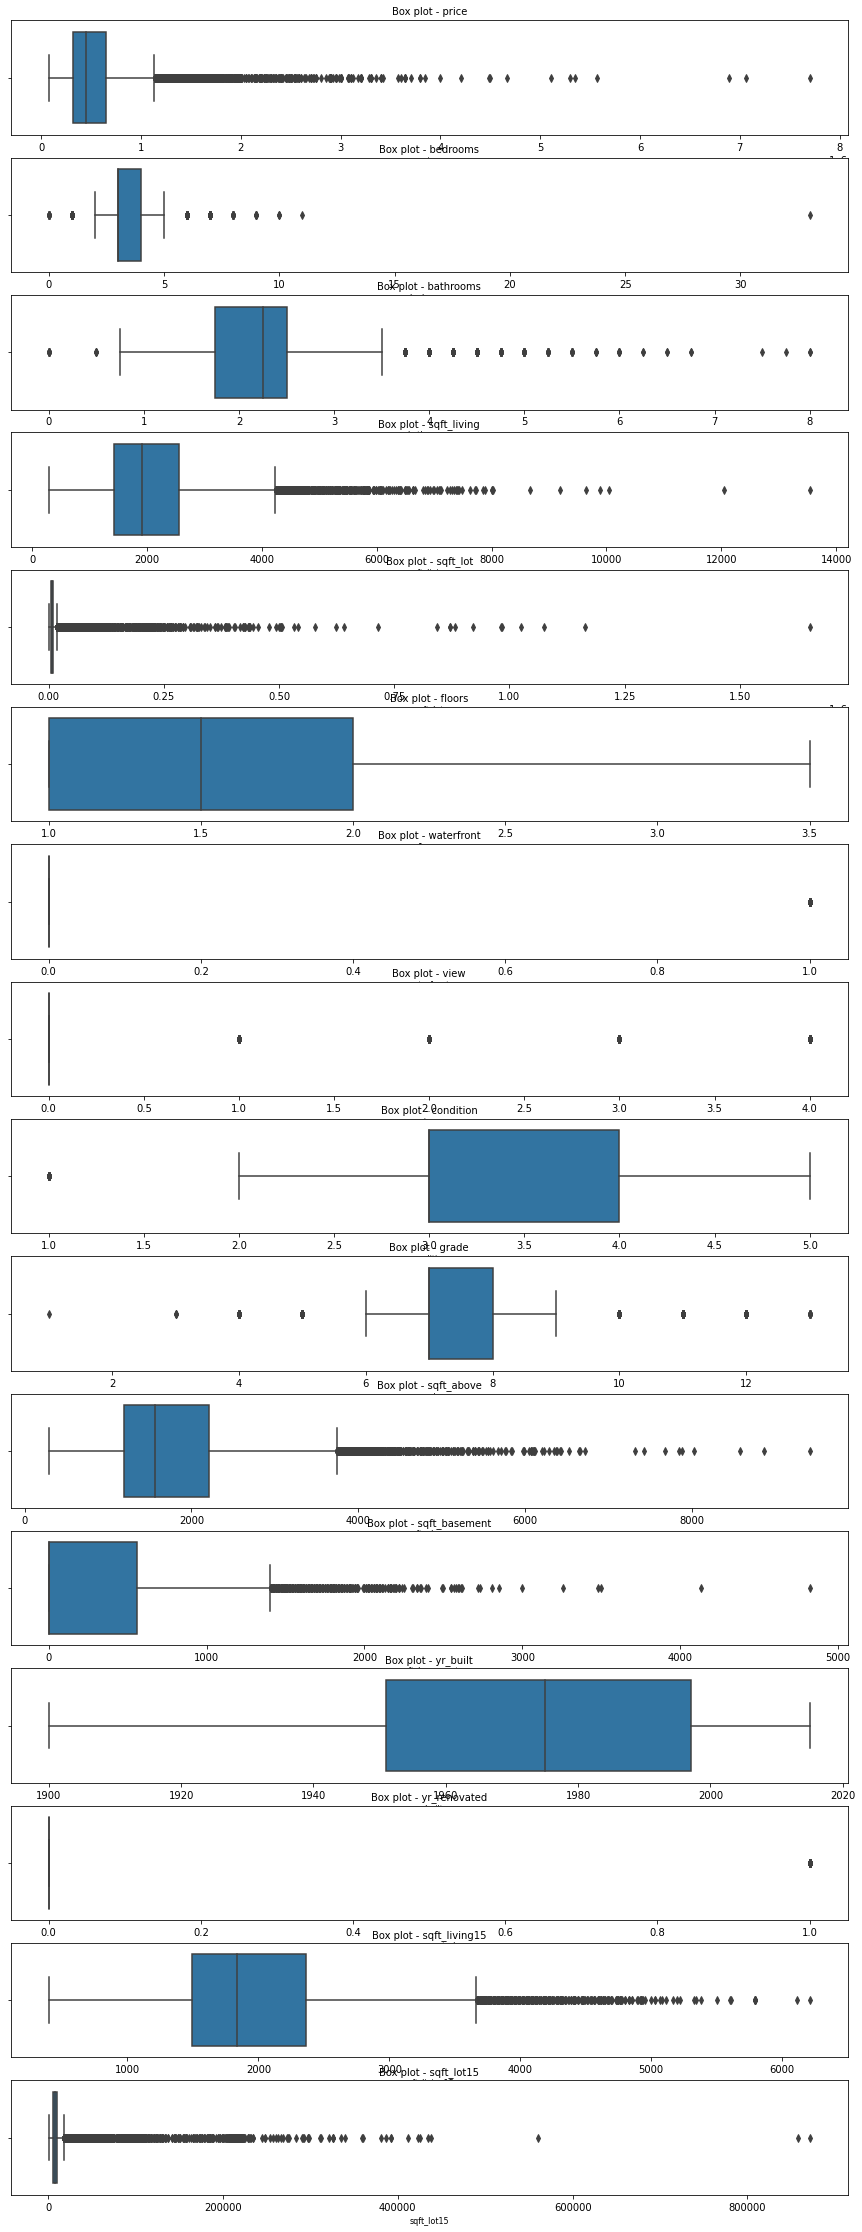

In [193]:
#Outliers bo plots
fig, ax = plt.subplots(len(cols), figsize=(15,40))

for i, col_val in enumerate(cols):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [94]:
# Check for outliers in the dataset.
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 -Q1
outliers = df[cols][((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape
# outliers are 6538 records. 


(6538, 16)

In [95]:
#create a new datasrt without outliers
data = df[cols][~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(15072, 16)

In [96]:
#Checking the unique values on the year renovated columns
df.yr_renovated.value_counts()

0       20697
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64



> IThe outliers identified were a big propotionof the data, removing them would significantly affect our prediction. We will therefore proceed and use the data as it is with the outliers.


In [97]:
#Sincee the year renovated had a lot of 0 values, we changed the columns to reflect 0 for those note renovated
#  and 1 for those that were renovalet.
df.loc[df['yr_renovated']==0,'yr_renovated']=0
df.loc[df['yr_renovated']>0,'yr_renovated']=1

In [98]:
#Confirming if the changes have been applied
df.yr_renovated.value_counts()

0    20697
1      913
Name: yr_renovated, dtype: int64

##Save the cleaned data

In [99]:
#saving the data to a csv file
df.to_csv('House prices Dataset.csv', index = False)

#loading the cleaned dataset to be used in the analysis
df = pd.read_csv('/content/House prices Dataset.csv')

#Exploratory Analysis

##Univariate Analysis

In [100]:
#getting the statistical summaries 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.507200e+04,15072.00000,15072.000000,15072.000000,15072.000000,15072.000000,15072.0,15072.0,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.0,15072.000000,15072.000000
mean,4.379252e+05,3.26181,1.972134,1813.863455,7018.603171,1.471105,0.0,0.0,3.418923,7.379644,1586.107418,227.756038,1971.819599,0.0,1796.424562,6899.001327
std,1.801669e+05,0.77152,0.645457,614.611956,3367.109330,0.547321,0.0,0.0,0.646593,0.804311,601.720622,352.627219,29.202805,0.0,508.071585,3002.841222
min,8.200000e+04,2.00000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,620.000000,651.000000
25%,3.000000e+05,3.00000,1.500000,1350.000000,4720.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,0.000000,1953.000000,0.0,1420.000000,4800.000000
50%,4.050000e+05,3.00000,2.000000,1740.000000,7068.500000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.000000,1975.000000,0.0,1700.000000,7200.000000
75%,5.450000e+05,4.00000,2.500000,2210.000000,8991.000000,2.000000,0.0,0.0,4.000000,8.000000,1910.000000,440.000000,1999.000000,0.0,2095.000000,8700.000000
max,1.130000e+06,5.00000,3.500000,4200.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,0.0,3640.000000,17550.000000


In [101]:
for i in cols:
  print(f'Frequency: {i}')
  print(df[i].value_counts().sort_values(ascending=False).head(5))
  print(' ')
  print('****'*20)

Frequency: price
450000.0    172
350000.0    172
550000.0    158
500000.0    152
425000.0    150
Name: price, dtype: int64
 
********************************************************************************
Frequency: bedrooms
3    9822
4    6881
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64
 
********************************************************************************
Frequency: bathrooms
2.50    5378
1.00    3852
1.75    3047
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64
 
********************************************************************************
Frequency: sqft_living
1300    138
1400    135
1440    133
1010    129
1660    129
Name: sqft_living, dtype: int64
 
********************************************************************************
Frequency: sqft_lot
5000    358
6000    290
4000    251
7200    220
4800    120
Name: sqft_lot, dtype: int64
 
********************************************************************************
Frequency: floors
1.0  

In [102]:
#measure of distribution
for i in cols:
  print(i)
  print("The skewness is:", data[i].skew())
  print("The kurtosis is:", data[i].kurt())
  s= abs(data[i].skew())
  if s > 1:
    print('highly skewed distribution')
  else:
    print('')
  k = df[i].kurt()
  if k >3:
    print('the distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('Distribution is light tailed')
  print("******"*10)

price
The skewness is: 0.8482029602496289
The kurtosis is: 0.463838213353267

the distribution is heavy-tailed(leptokutic)
************************************************************
bedrooms
The skewness is: 0.2447163794796829
The kurtosis is: -0.26568323931457183

the distribution is heavy-tailed(leptokutic)
************************************************************
bathrooms
The skewness is: -0.09366765790617125
The kurtosis is: -0.8154691288239904

Distribution is light tailed
************************************************************
sqft_living
The skewness is: 0.5498849733738457
The kurtosis is: -0.09796874370886322

the distribution is heavy-tailed(leptokutic)
************************************************************
sqft_lot
The skewness is: 0.5228633795024621
The kurtosis is: 0.4623923244430692

the distribution is heavy-tailed(leptokutic)
************************************************************
floors
The skewness is: 0.7695722553681242
The kurtosis is: -0.225605

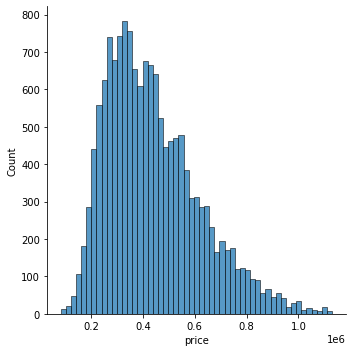

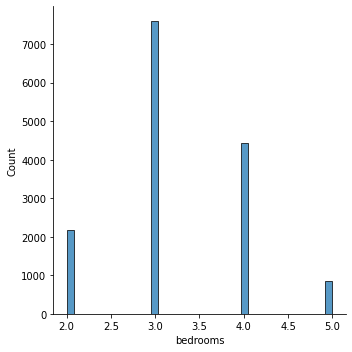

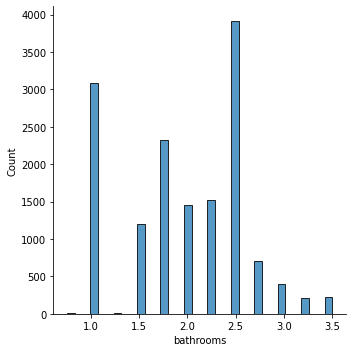

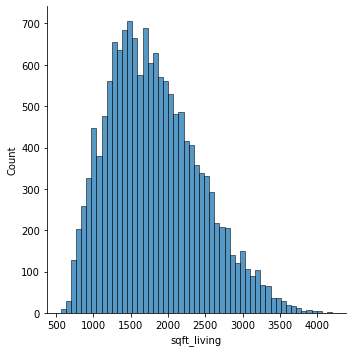

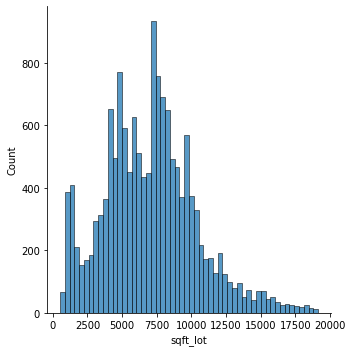

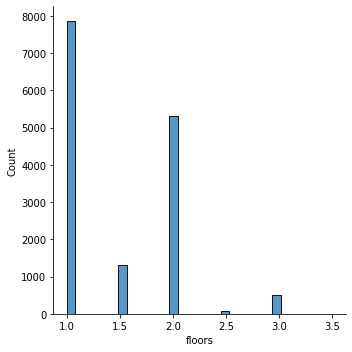

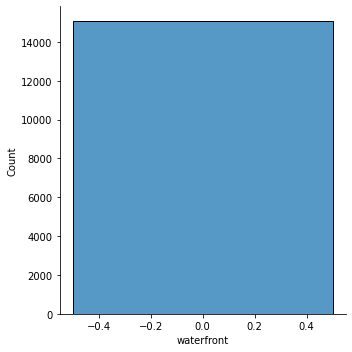

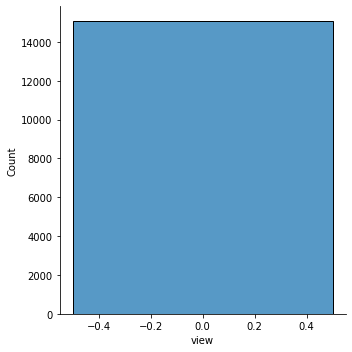

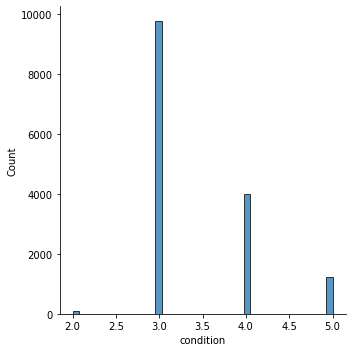

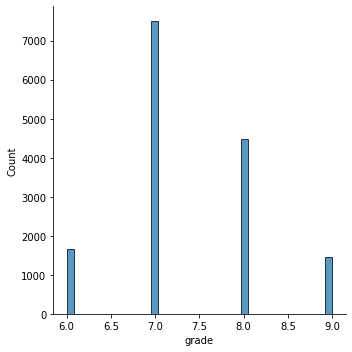

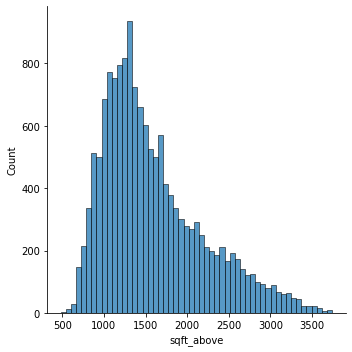

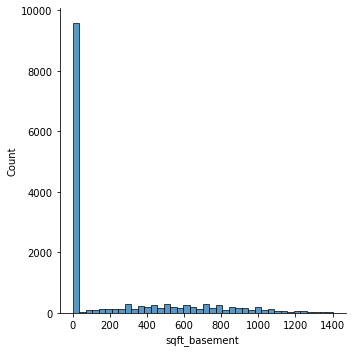

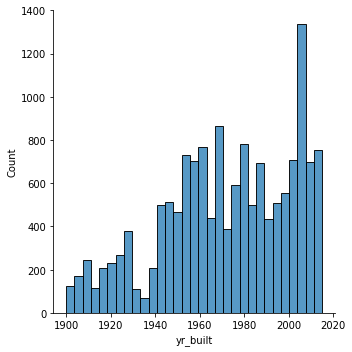

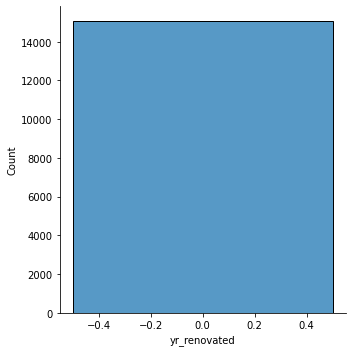

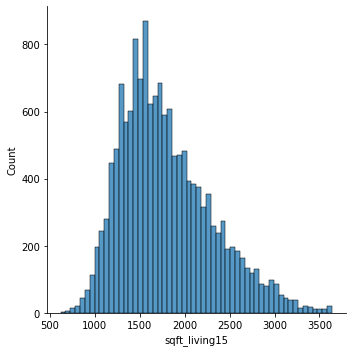

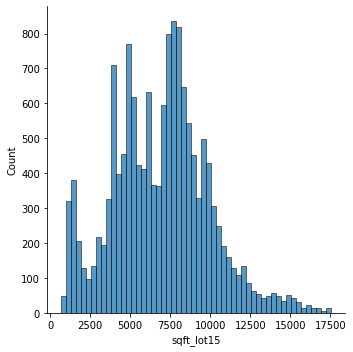

In [192]:
#Histograms to view the data distribution
import seaborn as sns

for i in cols:
  sns.displot(data[i])

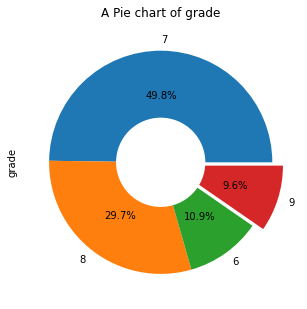

In [104]:
#Visulizing to Results
explode=[0,0,0,0.1]
data['grade'].value_counts().plot(kind= 'pie', figsize=[5,10], autopct = '%1.1f%%', explode=explode)
plt.title('A Pie chart of grade')

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)




> Grade 7,8,9,6 and10 we the top five house grade , with 7 containing 49.8% of all th houses sold.


Text(0.5, 1.0, 'Bedrooms')

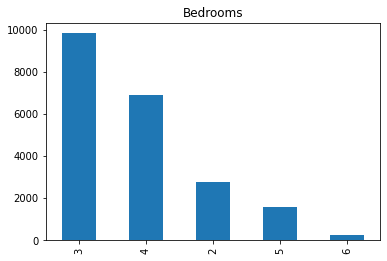

In [105]:
# Bar graph showing number of bedrooms 
df.bedrooms.value_counts().sort_values(ascending = False).nlargest(5).plot.bar()
plt.title('Bedrooms')

Text(0.5, 1.0, 'Number of Views for Houses')

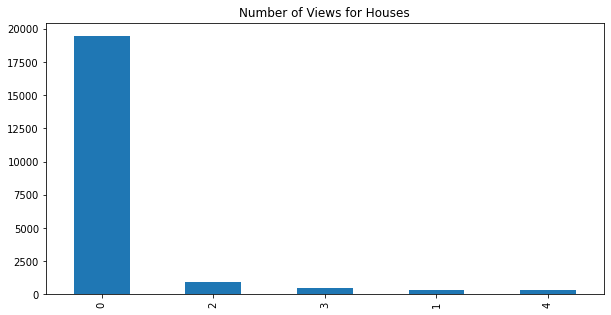

In [106]:
# Bar graph showing number of views

df.view.value_counts().sort_values(ascending = False).plot.bar(figsize=(10,5))
plt.title('Number of Views for Houses')

Text(0.5, 1.0, 'House grade')

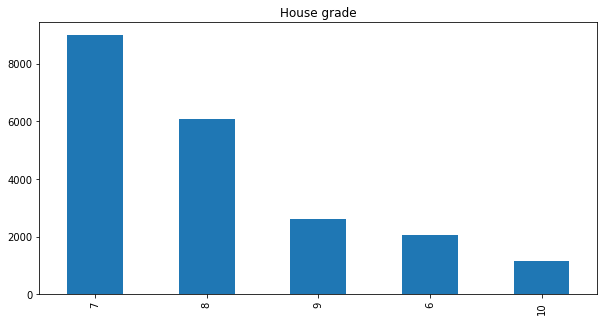

In [191]:
# Bar graph showing house grades

df.grade.value_counts().sort_values(ascending = False).nlargest(5).plot.bar(figsize=(10,5))
plt.title('House grade')

Text(0.5, 1.0, 'House condition')

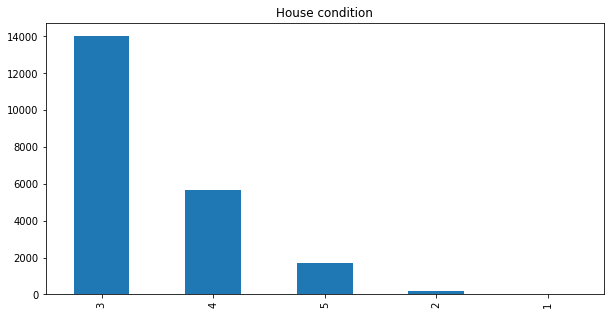

In [108]:
# Bar graph showing House condition
plt.figure(figsize = (12,7))
df.condition.value_counts().sort_values(ascending = False).plot.bar(figsize=(10,5))
plt.title('House condition')


Most Houses sold had a condition 3 and the least sold had condition 1

Text(0.5, 1.0, 'Houses renovated(1) and not renovated(0)')

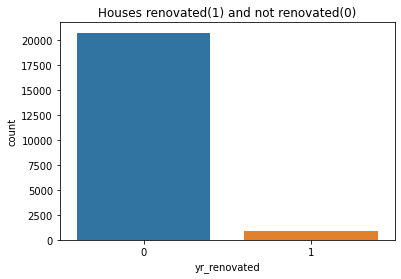

In [109]:
sns.countplot(x='yr_renovated', data=df)
plt.title('Houses renovated(1) and not renovated(0)')



> Most of the houses had no record of ever being renovated



##Bivariate Analysis

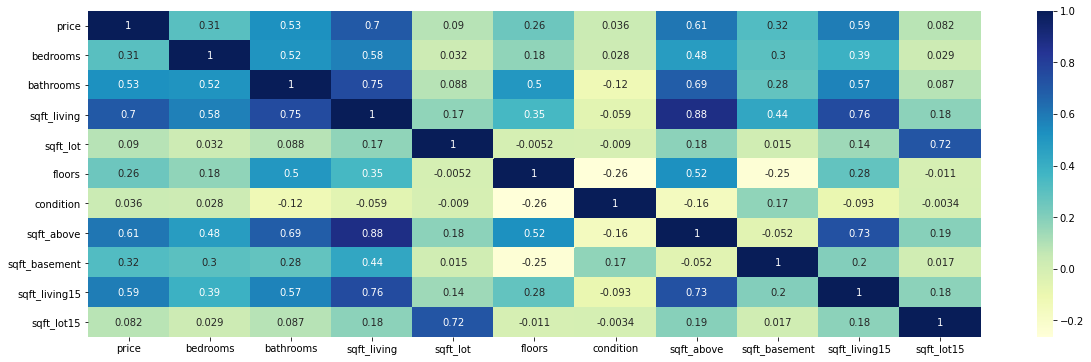

In [110]:
#Checking the correlations
import seaborn as sns

col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above',
       'sqft_basement',
       'sqft_living15', 'sqft_lot15']
corr=df[col].corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

sqft living, sqft above, and bathrooms had the highest positive correltion with price. Condition had the least correlation with price.

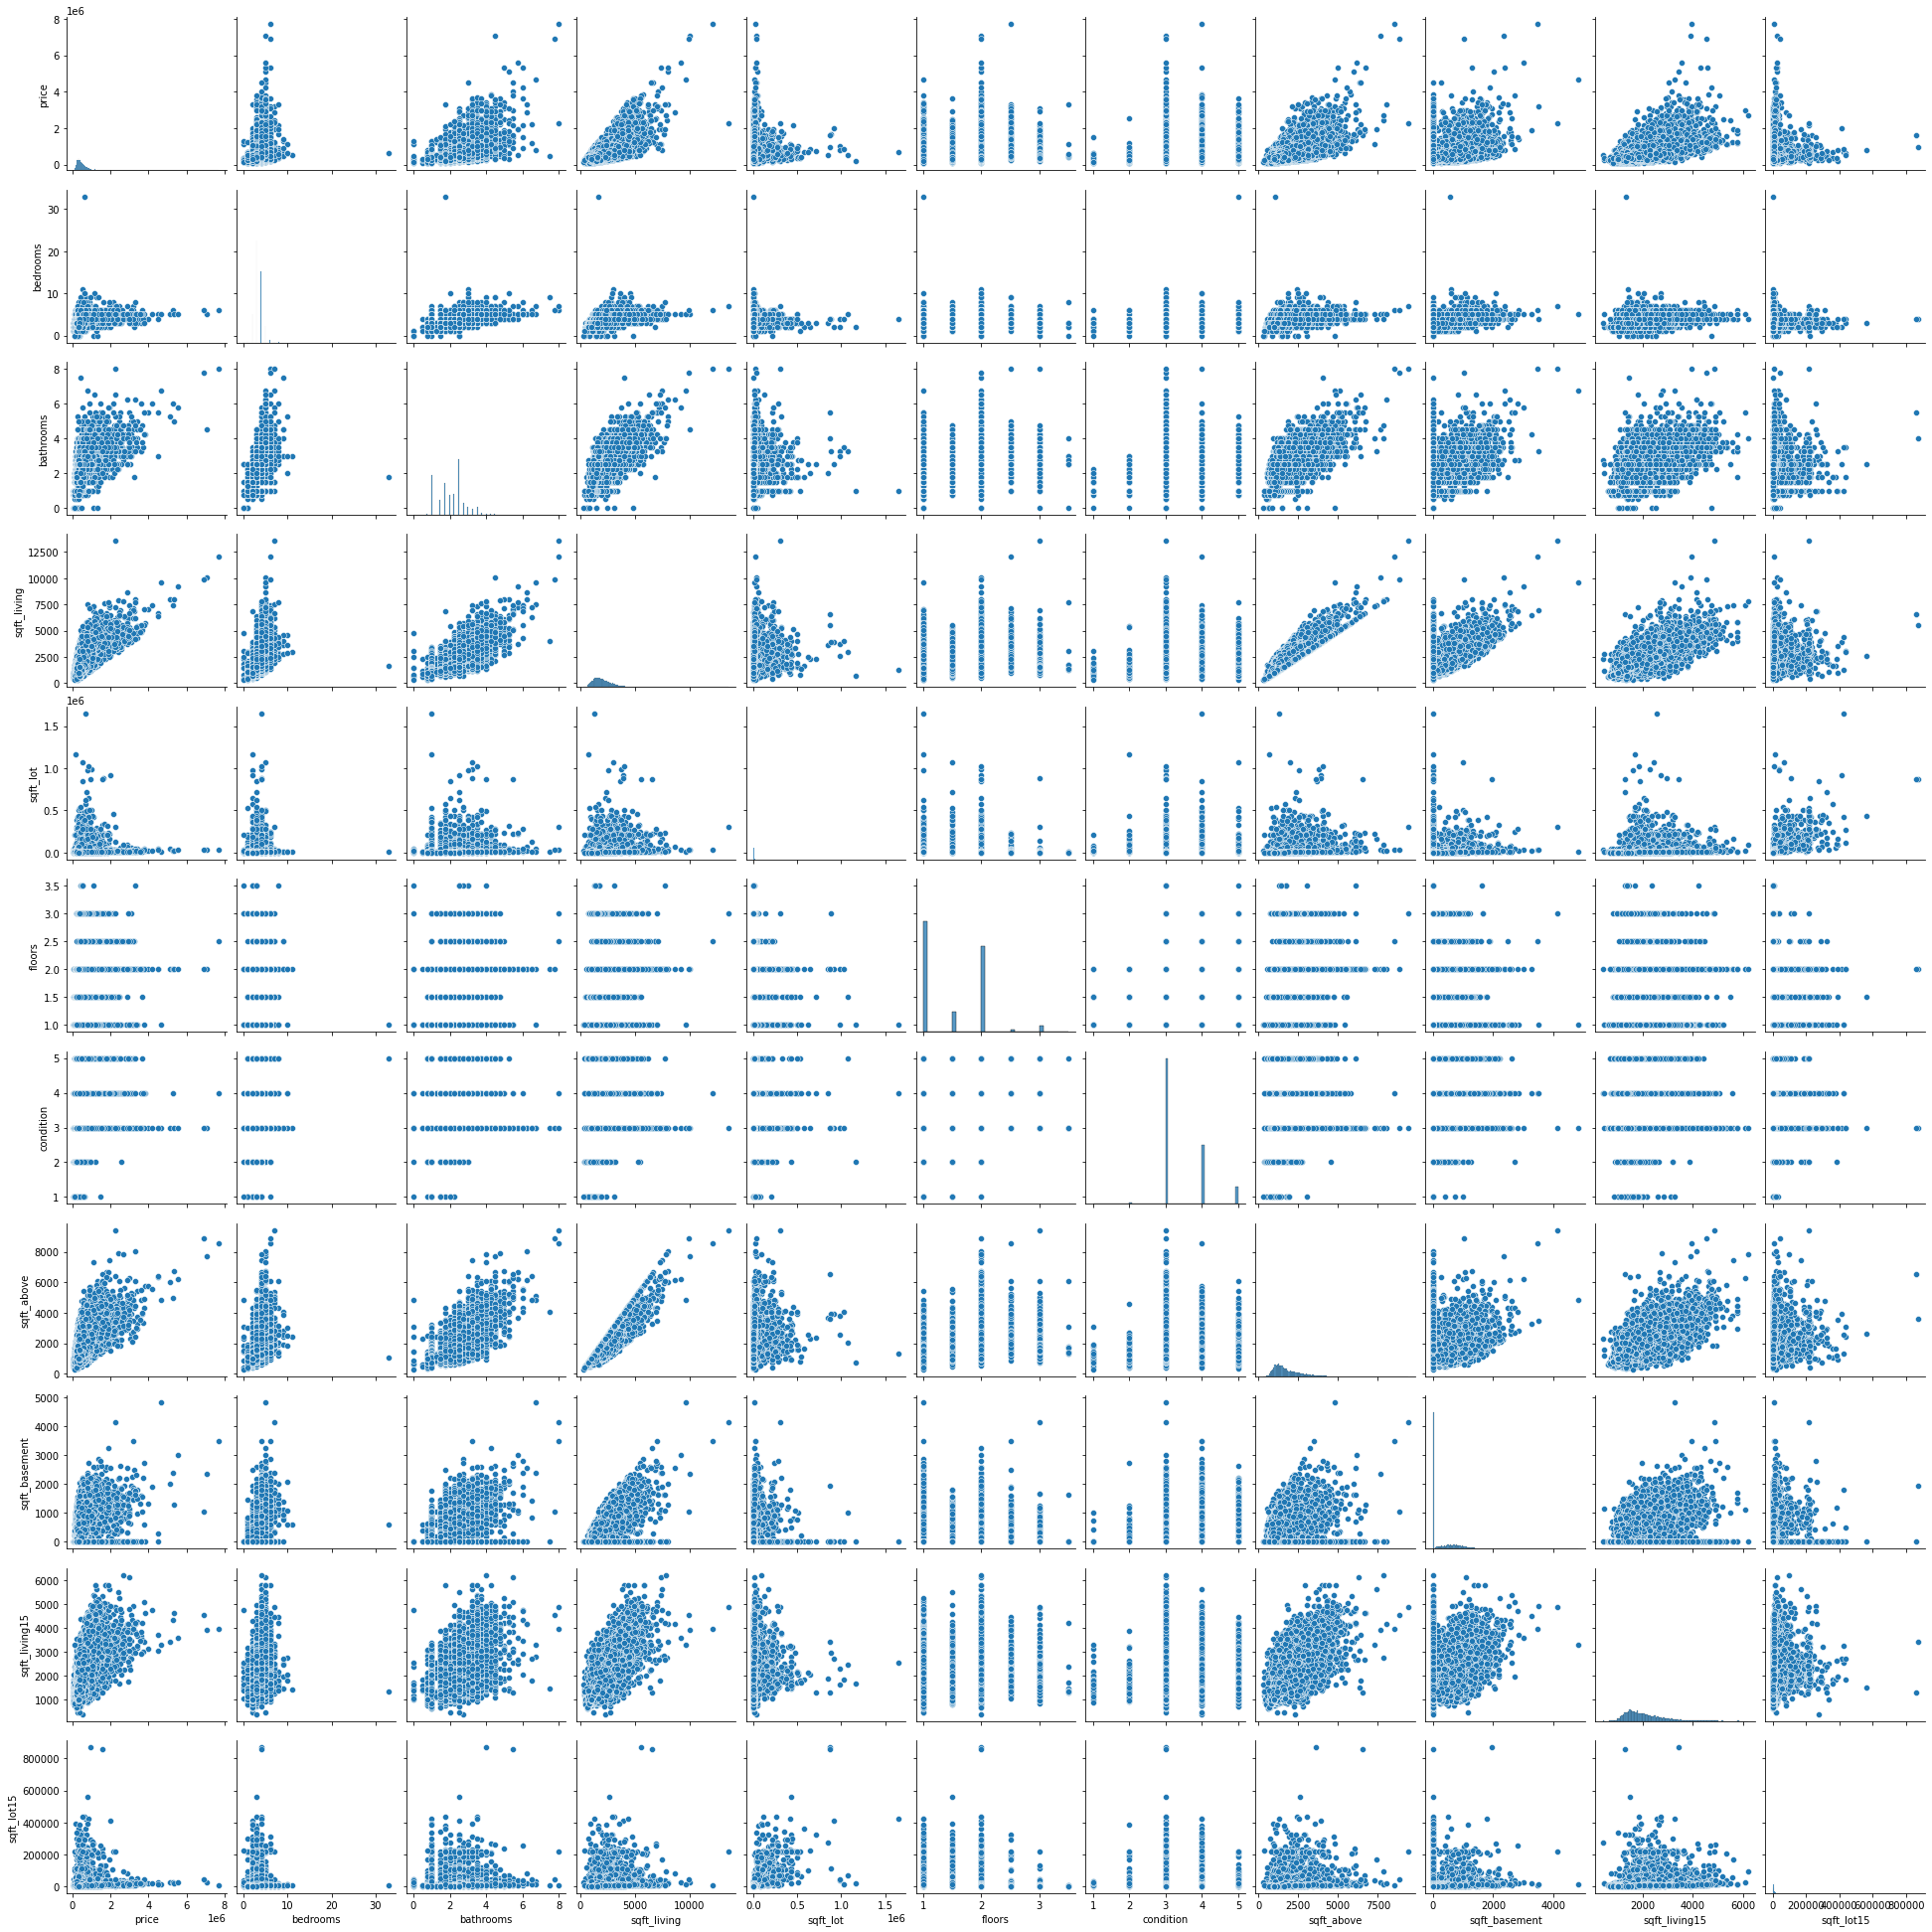

In [111]:
#pair plots
sns.pairplot(df[col])

#Regression Models

In [112]:
# creating a copy so that we can preserve the original data when we encode the data

df_copy = df.copy()

In [113]:
#Defining the x and y variables
X = df_copy.iloc[:,1:-1]
y = df_copy.iloc[:, 0]

##Multilinear Regression

###Multicolinearity Test

In [114]:
corr = X.corr()

# Let's use these correlations to compute the VIF score for each variable.
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
VIF_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15
price,2.882095,0.282288,-0.280534,-7.134198e-01,0.082716,-0.119855,-0.391916,-0.260916,-0.097675,-1.111682,-3.909188e-01,-2.326260e-01,0.829428,-0.030187,-0.124416
bedrooms,0.282288,1.668662,-0.491470,-6.676402e-01,0.109857,0.054964,0.023640,0.091899,-0.073054,0.212729,-3.764015e-01,-2.057018e-01,0.178288,0.038368,0.006818
bathrooms,-0.280534,-0.491470,3.372586,-3.002928e+00,0.026122,-0.673716,0.048363,-0.013948,-0.125463,-0.184592,1.556088e+00,4.195052e-01,-0.992909,-0.253360,0.114190
sqft_living,-0.716223,-0.667388,-3.001828,1.808269e+13,-0.069895,2.646681,0.042896,0.011817,-0.140417,-1.760523,-1.630373e+13,-8.713486e+12,0.375087,-0.128591,-0.912887
sqft_lot,0.082716,0.109857,0.026122,-6.994977e-02,1.063870,0.141190,0.005208,-0.058094,-0.010073,0.045463,-3.507447e-01,-3.099774e-02,-0.024764,-0.010029,0.006644
floors,-0.119855,0.054964,-0.673716,2.647386e+00,0.141190,1.932147,0.013178,-0.052019,0.138734,-0.286334,-2.771063e+00,-6.871460e-01,-0.330950,-0.054525,0.372189
waterfront,-0.391916,0.023640,0.048363,4.283548e-02,0.005208,0.013178,1.256511,-0.458054,-0.002329,0.200055,-9.349193e-03,5.420457e-02,-0.135809,-0.062791,0.072810
view,-0.260916,0.091899,-0.013948,1.023281e-02,-0.058094,-0.052019,-0.458054,1.427961,0.000765,-0.083801,1.311721e-01,-2.242687e-01,0.123949,-0.031426,-0.252634
condition,-0.097675,-0.073054,-0.125463,-1.405247e-01,-0.010073,0.138734,-0.002329,0.000765,1.224104,0.023500,1.898871e-01,1.517662e-02,0.442450,0.194909,0.037197
grade,-1.111682,0.212729,-0.184592,-1.760881e+00,0.045463,-0.286334,0.200055,-0.083801,0.023500,3.656489,5.157977e-01,5.187396e-01,-0.710682,-0.026644,-0.771266




> None of the variables had a VIF score higher than 5 indicating the variables have low correlation and we can proceed with the regression model.



### The Model

In [115]:
# Declaring our X and y variables
X = df_copy.drop(['price','id'], axis=1)
y = df_copy.price

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)
from sklearn.linear_model import LinearRegression

# split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#display the intercept 
print('The intercept :' ,regressor.intercept_)
print('')

#Below are the coefficients of this model.
#We use a for loop to go through the model and the zip function to combine the two columns.

#Checking the coefficients
print('Model coefficients')
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef
coef_dict_baseline


The intercept : 539365.0871702915

Model coefficients


{'bathrooms': 33561.72973765401,
 'bedrooms': -36936.63413174178,
 'condition': 13107.238695627047,
 'floors': 14189.035828007576,
 'grade': 140050.9177471867,
 'sqft_above': 64301.89362685111,
 'sqft_basement': 38472.54083343911,
 'sqft_living': 76476.44867126591,
 'sqft_living15': 18086.137723826243,
 'sqft_lot': 246.30382839657977,
 'sqft_lot15': -14701.215317521037,
 'view': 33016.124423272704,
 'waterfront': 54588.70557007358,
 'yr_built': -103513.56881305997,
 'yr_renovated': 4024.3663601952576}

In [116]:
# Making Predictions to see how the model functions

y_pred = regressor.predict(X_test)
# To compare the actual output values for X_test with the predicted values
# 
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
comparison_df.describe()

,Actual,Predicted
count,4.322000e+03,4.322000e+03
mean,5.434344e+05,5.394293e+05
std,3.625612e+05,3.025930e+05
min,8.100000e+04,-5.705160e+05
25%,3.230000e+05,3.368496e+05
50%,4.500000e+05,4.727919e+05
75%,6.500000e+05,6.708690e+05
max,4.000000e+06,2.360459e+06


In [211]:
# Model evaluation

base_model = metrics.mean_squared_error(y_test, y_pred)
 
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))  
print('\nRoot Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nThe R2 score is          : ', r2_score(y_test, y_pred))

Mean Squared Error       :  44428144941.89636

Root Mean Squared Error  :  210779.8494683407

The R2 score is          :  0.6619382030984675


###Residual Plot

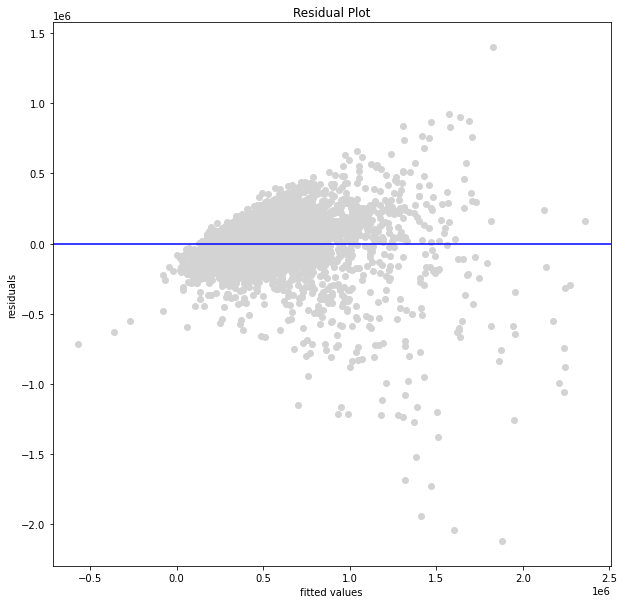

In [118]:
# Checking for Residuals in our predicted values

residuals = y_pred - y_test

# Plotting the prediction errors

plt.figure(figsize = (10,10))
plt.scatter(y_pred, residuals, color='lightgrey')
plt.title('Residual Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

###Heteroskedasticity Test

In [119]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.
import scipy as sp
from scipy.stats import bartlett
test, p_value = bartlett(y_pred, residuals)

print('test result is:',test)
print('the p_value is:', p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

#Let us use a loop to compare the critical value and the test result

if (test > critical_value):
  print('\nthe variances are heterogeneous')
  print('There is a pattern to the errors.')
else:
  print('\nThe variances are Homogeneous!')
  print('There is no pattern to the errors.')

test result is: 557.765240358881
the p_value is: 2.574874832355113e-123

The variances are Homogeneous!
There is no pattern to the errors.


###Model summary


> This mean standard error score of 44260083314.63932 is our benchmark for determining if the quantile, ridge, lasso, and elastic net model will perform better or worse than the liniear model.


> The R2 score shows that the model is 66.32% accurate. It is better than 50% but an accuracy score less than 80% means that this is not the best prediction model.





##Quantile Regression

In [202]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
X = df_copy.drop(['price','id'], axis=1)
y = df_copy.price

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)


# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15', df)
res = mod.fit(q=.5)

# mod = smf.quantreg('price ~ bedrooms + bathrooms + view + condition + grade + sqft_above + sqft_living15 ', data)
# res = mod.fit(q=.5) 


# Then print out the summary of our model
#
print(res.summary())
# You see that our intercept is  and our slope or the coefficient for our x is 
# These are the parameters for the 0.5th quantile of our y.

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3781
Model:                       QuantReg   Bandwidth:                   2.500e+04
Method:                 Least Squares   Sparsity:                    3.432e+05
Date:                Sat, 24 Jul 2021   No. Observations:                21610
Time:                        08:31:09   Df Residuals:                    21600
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.073e+06   9.92e+04     30.976      0.000    2.88e+06    3.27e+06
view           5.575e+04   1659.234     33.601      0.000    5.25e+04     5.9e+04
condition      2.254e+04   1969.181     11.446      0.000    1.87e+04    2.64e+04
grade          1.201e+05   1741.428  

In [121]:
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms'], res.params['sqft_living'],
                res.params['grade'], res.params['condition']]
               + [res.conf_int().loc['bedrooms'].tolist(), res.conf_int().loc['sqft_living'].tolist(),
                  res.conf_int().loc['grade'].tolist(), res.conf_int().loc['condition'].tolist()])

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'bedrooms_coef', 'sqft_living_coef',
                                                'grade_coef', 'condition_coef', 
                                                'bedrooms_bound', 'sqft_living_bound', 'grade_bound', 
                                                'condition_bound'])

In [122]:
params

,qt,intercept,bedrooms_coef,sqft_living_coef,grade_coef,condition_coef,bedrooms_bound,sqft_living_bound,grade_bound,condition_bound
0,0.1,-189231.164439,-12643.835613,72.773973,44493.150697,11446.917803,"[-15592.255863992837, -9695.415361554953]","[68.00531393858986, 77.54263124197601]","[41529.22547445048, 47457.07592004563]","[8667.28962431724, 14226.54598127562]"
1,0.2,-243106.909758,-19246.363477,76.045454,56194.181854,16676.909157,"[-22521.814132982712, -15970.912821756829]","[70.76625431512007, 81.3246544612593]","[52954.59202679124, 59433.771680801474]","[13478.242271390425, 19875.576042163724]"
2,0.3,-385338.715491,-25692.834066,85.783221,75478.933873,30123.515658,"[-29930.36419222103, -21455.303940560952]","[79.08667625163424, 92.47976669992578]","[71317.29322996153, 79640.57451567636]","[26040.692910765498, 34206.33840618159]"
3,0.4,-475665.154591,-27746.265589,96.747967,85344.677523,43362.639573,"[-32417.654004212527, -23074.877174049558]","[89.47173496909991, 104.02419996719445]","[80736.97325118464, 89952.38179572094]","[38891.9022691299, 47833.376876937604]"
4,0.5,-530019.089442,-26965.881481,105.558830,91763.228209,51789.118970,"[-31992.363166909206, -21939.399794836056]","[97.85461930302071, 113.26304140745097]","[86832.63771306373, 96693.81870437764]","[47016.5997586883, 56561.63818111374]"
5,0.6,-546168.101572,-25695.402376,110.632184,94793.103203,56837.643570,"[-30376.115594328556, -21014.689157293004]","[103.58900248146186, 117.67536598958556]","[90269.6465339855, 99316.55987131421]","[52455.00429009827, 61220.28285073669]"
6,0.7,-533700.508321,-24639.593968,119.796954,91568.527986,65472.081292,"[-29868.281707696588, -19410.90622923526]","[112.03005371652291, 127.56385495342799]","[86593.96794388644, 96543.08802800425]","[60620.642573701734, 70323.52001029685]"
7,0.8,-499353.596991,-21250.013830,123.687682,88572.830181,70672.566316,"[-27465.69103527671, -15034.336624998166]","[114.63999454479418, 132.7353698332632]","[82746.35434163851, 94399.30601993133]","[65046.216767012564, 76298.91586580007]"
8,0.9,-448292.857104,-17528.571433,127.142857,86507.142852,75800.000000,"[-26586.43619228164, -8470.706674072795]","[114.50642676411752, 139.7792875272724]","[78381.23175595567, 94633.05394767824]","[67767.11391524493, 83832.88608472238]"


##Ridge Regression

In [123]:
#Defining the dependent and indepedent variables
X = df_copy.iloc[:,2:-1]
y = df_copy.iloc[:, 1]

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)

In [124]:
#Grid Search
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-2,100,100)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [125]:
#Fit the mosel to the data
search.fit(X_train,y_train,)

#The best alpha forour model given the range we set in the grid search
search.best_params_


{'alpha': 0.01}

In [126]:
#The best Mean squared error we can expect to get from the ridge model
ridge_mse = abs(search.best_score_)
print(ridge_mse)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

47884570133.544716

The ridge model produced a higher mean squared error.
Therefore the linear model is the better model compaired to the ridge model.


In [127]:
#SECOND/TEST MODEL

# We can confirm the above outcome by fitting our model with 
#   the best parameters from the grid search and finding the mean squared error.
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
second_model = (mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))
print(second_model)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

#checking the model accuracy using R2 score
k = (r2_score(y_test, y_pred))*100
print('\nThe R2 score for the ridge model :', r2_score(y_test, y_pred))
print('The model is ', k ,'% accurate')

44428144941.89636

The ridge model produced a higher mean squared error.
Therefore the linear model is the better model compaired to the ridge model.

The R2 score for the ridge model : 0.6619382030984675
The model is  66.19382030984676 % accurate


In [166]:
#Below are the coefficients of these models.
#We use a for loop to go through the model and the zip function to combine the two columns.

#Checking the coefficients
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline


{'bathrooms': 33561.72973765401,
 'bedrooms': -36936.63413174178,
 'condition': 13107.238695627047,
 'floors': 14189.035828007576,
 'grade': 140050.9177471867,
 'sqft_above': 64301.89362685111,
 'sqft_basement': 38472.54083343911,
 'sqft_living': 76476.44867126591,
 'sqft_living15': 18086.137723826243,
 'sqft_lot': 246.30382839657977,
 'view': 33016.124423272704,
 'waterfront': 54588.70557007358,
 'yr_built': -103513.56881305997,
 'yr_renovated': 4024.3663601952576}

In [167]:
#Checking the coefficients
print('Ridge coefficients')
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat]= coef
coef_dict_baseline


Ridge coefficients


{'bathrooms': -32810.84468816268,
 'bedrooms': 163078.61844224815,
 'condition': -3496.2746866522934,
 'floors': 2190.9852450141575,
 'grade': -1407.9871287593903,
 'sqft_above': 2573.262414051783,
 'sqft_basement': 1114.4595804606665,
 'sqft_living': 1049.6647631908404,
 'sqft_lot': 1117.8305742953735,
 'view': 2135.0313004674977,
 'waterfront': 761.0423290656283,
 'yr_built': -745.7955642904326,
 'yr_renovated': -2970.9606782499695}

###Model summary

> The best alpha for our model would be 0.01 and the best mean squared error we can expect from the model is 47877922923.82684 .This MSE value is higher than the MSE from the linear model indicating that the linear model did better than the ridge model.

> Increasing number of bathrooms, year built, grade and year renovated leads to a decrease in the house price.  The ridge model reduced the sqft_living15 variable to zero.

> Number of the bedrooms had the highest positive impact on the the house price. A one unit increase in bedrooms incressed the house price by approximately 163,000.

> The second model was used to test the model. The MSE from the second model was much closer to the benchmark MSE but this is because there cross validation was not done on this model.

> The coefficient values are about the same. This means that the penalization made little difference with this dataset.







##Lasso Regression

In [ ]:
#Defining the dependent and indepedent variables
X = df_copy.iloc[:,2:-1]
y = df_copy.iloc[:, 1]

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)

In [182]:
#determine what value to set the l1 or alpha to prior to creating the model.

lasso=Lasso(normalize=True)
search=GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-8,8,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.00000000e-08, 5.99484250e-07, 3.59381366e-05, 2.15443469e-03,
       1.29154967e-01, 7.74263683e+00, 4.64158883e+02, 2.78255940e+04,
       1.66810054e+06, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [184]:
#Fit the mosel to the data
search.fit(X_train,y_train,)

#The best alpha forour model given the range we set in the grid search
search.best_params_

{'alpha': 7.742636826811277}

In [132]:
#The best Mean squared error we can expect to get from the ridge model
lasso_mse = abs(search.best_score_)
print(lasso_mse)

#Compare the results of the lasso regression to the linear regression
if base_model > lasso_mse:
  print('\nThe lasso model produced a lower mean squared error.')
  print('Therefore the lasso model is better compaired to the linear model.')
else:
  print('\nThe lasso model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the lasso model.')

47813575396.97955

The lasso model produced a higher mean squared error.
Therefore the linear model is the better model compaired to the lasso model.


In [185]:
#SECOND/TEST MODEL

# We can confirm the above outcome by fitting our model with 
#   the best parameters from the grid search and finding the mean squared error.
#
lasso=Lasso(normalize=True,alpha=7.742636826811277)
lasso.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=lasso.predict(X)))
print(second_model)

#Compare the results of the lasso regression to the linear regression
if base_model > second_model:
  print('\nThe lasso model produced a lower mean squared error.')
  print('Therefore the lasso model is better compaired to the linear model.')
else:
  print('\nThe lasso model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the lasso model.')

#checking the model accuracy using R2 score
k = (r2_score(y_test, y_pred))*100
print('\nThe R2 score for the ridge model :', r2_score(y_test, y_pred))
print('The model is ', k ,'% accurate')

46847196392.95012

The lasso model produced a higher mean squared error.
Therefore the linear model is the better model compaired to the lasso model.

The R2 score for the ridge model : 0.6619382030984675
The model is  66.19382030984676 % accurate


In [169]:
#Below are the coefficients of these models.
#We use a for loop to go through the model and the zip function to combine the two columns.

#Checking the coefficients
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline

{'bathrooms': 33561.72973765401,
 'bedrooms': -36936.63413174178,
 'condition': 13107.238695627047,
 'floors': 14189.035828007576,
 'grade': 140050.9177471867,
 'sqft_above': 64301.89362685111,
 'sqft_basement': 38472.54083343911,
 'sqft_living': 76476.44867126591,
 'sqft_living15': 18086.137723826243,
 'sqft_lot': 246.30382839657977,
 'view': 33016.124423272704,
 'waterfront': 54588.70557007358,
 'yr_built': -103513.56881305997,
 'yr_renovated': 4024.3663601952576}

In [170]:
#Below are the coefficients of these models.
#We use a for loop to go through the model and the zip function to combine the two columns.

#Checking the coefficients
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline

{'bathrooms': 46263.88466005715,
 'bedrooms': -38663.150412241484,
 'condition': 19099.25232596689,
 'floors': 28285.817794033013,
 'grade': 120581.99591806634,
 'sqft_above': -87.26715590572574,
 'sqft_basement': -79.78256515187763,
 'sqft_living': 246.46575023515234,
 'sqft_living15': 22.980016449052684,
 'sqft_lot': -0.25401916624999993,
 'view': 43415.361568231856,
 'waterfront': 577238.5673097746,
 'yr_built': -3598.000202257233,
 'yr_renovated': 19067.390861908378}

###Model summary

> The best alpha for our model would be 7.74263 and the best mean squared error we can expect from the model is 47878356038.55724 .This MSE value is higher than the MSE from the linear model indicating that the linear model did better than the ridge model.



> The second model was used to test the model. The MSE from the second model was much closer to the benchmark. This is because cross validation was not done in this model.


> The coefficient values are about the same. This means that the penalization made little difference with this dataset.

##Elastic Net Regression

In [187]:
#Setting up the grid of our model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [188]:
# fit our model and display the best parameters and the best results we can get with that setup.

#best parameters
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [173]:
#best mean squared error that can be obtained
elastic = search.best_score_
print(abs(search.best_score_))

#Compare the results of the lasso regression to the linear regression
if base_model > elastic:
  print('\nThe elastic model produced a lower mean squared error.')
  print('Therefore the elastic model is better compaired to the linear model.')
else:
  print('\nThe elastic model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the elastic model.')

47542131168.83781

The elastic model produced a lower mean squared error.
Therefore the elastic model is better compaired to the linear model.


In [189]:
#For clarity, we will set our hyperparameters to the recommended values and run on the data.
elastic=ElasticNet(normalize=True,alpha= 0.00001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

if base_model > second_model:
  print('\nThe elastic model produced a lower mean squared error.')
  print('Therefore the elastic model is better compaired to the linear model.')
else:
  print('\nThe elastic model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the elastic model.')

#checking the model accuracy using R2 score
k = (r2_score(y_test, y_pred))*100
print('\nThe R2 score for the ridge model :', r2_score(y_test, y_pred))
print('The model is ', k ,'% accurate')

46954592350.57266

The elastic model produced a higher mean squared error.
Therefore the linear model is the better model compaired to the elastic model.

The R2 score for the ridge model : 0.6619382030984675
The model is  66.19382030984676 % accurate


In [175]:
#Below are the coefficients of these models.
#We use a for loop to go through the model and the zip function to combine the two columns.

#Checking the coefficients
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline

{'bathrooms': 33561.72973765401,
 'bedrooms': -36936.63413174178,
 'condition': 13107.238695627047,
 'floors': 14189.035828007576,
 'grade': 140050.9177471867,
 'sqft_above': 64301.89362685111,
 'sqft_basement': 38472.54083343911,
 'sqft_living': 76476.44867126591,
 'sqft_living15': 18086.137723826243,
 'sqft_lot': 246.30382839657977,
 'view': 33016.124423272704,
 'waterfront': 54588.70557007358,
 'yr_built': -103513.56881305997,
 'yr_renovated': 4024.3663601952576}

In [177]:
# #Checking the coefficients
print('Elastic coefficients')
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat]= coef
coef_dict_baseline

Elastic coefficients


{'bathrooms': 43846.02727936911,
 'bedrooms': -34023.97091840787,
 'condition': 21153.303357519297,
 'floors': 29031.040707336677,
 'grade': 109763.92351458981,
 'sqft_above': 74.92100665619733,
 'sqft_basement': 84.04492135619834,
 'sqft_living': 80.41979707818892,
 'sqft_living15': 32.24837624369886,
 'sqft_lot': -0.23171186805761118,
 'view': 45476.18557556787,
 'waterfront': 556906.2182608712,
 'yr_built': -3255.885130605814,
 'yr_renovated': 31175.84472616759}

###Model summary

> The best alpha for our model is 1e-05, the best l1_ratio for the model is  0.8, and the best mean squared error we can expect from the model is 47541568894.5406 .This MSE value is lower than the MSE from the linear model indicating that the elastic net model did better than the linear model(as well as all the other models).


> The coefficient values were a little different from the linear coefficients. This means that the penalizations used in the elastic net model made a difference with this dataset.

#Conclusion

## Did we have the right data?

> Indented blockThe data provided had all the relevant columns for analysing and predicting house prices. We can thus conclude that the data provided was good.

##Challenging the solution


> Even though the right data was provided, the regression models used all had an accuracy level below 80%. This means that none of this model were appropriate according to the data given. Better prediction models should be used to create a better and more accuratemodel.


